In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict
%matplotlib inline

In [2]:
df_2021 = pd.read_csv('Udacity/Surevy 2021/survey_results_public_2021.csv')

In [3]:
#check 2021 data
pd.set_option('display.max_columns',None)
df_2021.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [4]:
##1. How many users are working as a data scientist, data analyst, or business analyst?
devtype_vals = ["Academic researcher",
"Data or business analyst",
"Data scientist or machine learning specialist",
"Database administrator",
"Designer",
"Developer, back-end",
"Developer, desktop or enterprise applications",
"Developer, embedded applications or devices",
"Developer, front-end",
"Developer, full-stack",
"Developer, game or graphics",
"Developer, mobile",
"Developer, QA or test",
"DevOps specialist",
"Educator",
"Engineer, data",
"Engineer, site reliability",
"Engineering manager",
"Marketing or sales professional",
"Product manager",
"Scientist",
"Senior Executive (C-Suite, VP, etc.)",
"Student",
"System administrator"]

In [5]:
temp= df_2021[df_2021['DevType'].isin(devtype_vals)]
temp1 = (temp['DevType'].value_counts()/temp['DevType'].count())*100
temp1

Developer, full-stack                            34.113354
Developer, back-end                              21.683259
Developer, front-end                              9.526831
Developer, mobile                                 6.917067
Developer, desktop or enterprise applications     3.450601
Student                                           3.165034
Developer, embedded applications or devices       2.934994
Data scientist or machine learning specialist     2.613731
Engineering manager                               1.868084
Academic researcher                               1.574585
Engineer, data                                    1.515091
Developer, QA or test                             1.423869
Senior Executive (C-Suite, VP, etc.)              1.419902
DevOps specialist                                 1.396105
Data or business analyst                          1.320747
System administrator                              1.027248
Product manager                                   0.7734

<AxesSubplot:title={'center':'Developer Type'}>

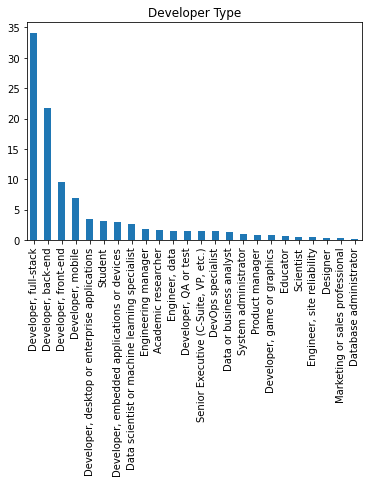

In [6]:
#plot the numbers above
temp1.plot(kind='bar',title = 'Developer Type')

In [7]:
#as we can see above most of the respondents are working as a developer full stack, back end and front end, and only a few are working as a Data Scientists or Machine Learning Specialist and Data or Business Analysts

In [8]:
#2. How to get into this field, what kind of higher education does data scientists or business analysts held? Do they have any other 
jobtype = ["Data scientist or machine learning specialist","Data or business analyst"]

In [9]:
ds_2021 = df_2021[df_2021['DevType'].isin(jobtype)]
ds_2021['DevType'].value_counts()

Data scientist or machine learning specialist    659
Data or business analyst                         333
Name: DevType, dtype: int64

<AxesSubplot:title={'center':'Education Background'}>

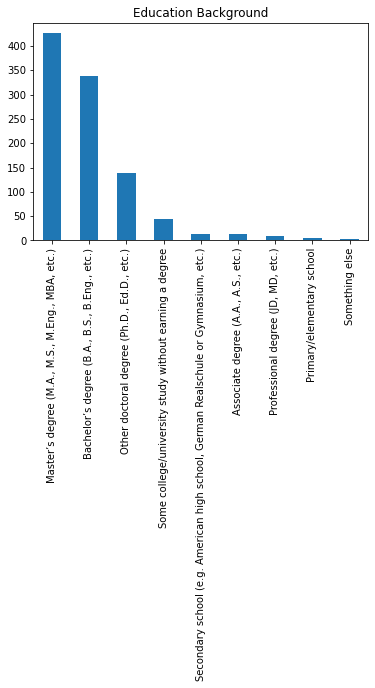

In [10]:
edlvl = ds_2021['EdLevel'].value_counts()
edlvl.plot(kind='bar', title = 'Education Background')

In [11]:
#other type of education
code_vals = ['Books / Physical media','Coding Bootcamp','Friend or family member','Colleague','Online Courses or Certification',
             'Online Forum','Other online resources (ex: videos, blogs, etc)','School','Other']


In [12]:
def total_count(df, col1, col2, look_for):
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

In [13]:
code = ds_2021['LearnCode'].value_counts().reset_index()
code.rename(columns={'index': 'method', 'LearnCode': 'count'}, inplace=True)
code_df = total_count(code, 'method', 'count', code_vals)
code_df.set_index('method',inplace=True)
code_temp = (code_df/code_df.sum())*100

In [14]:
code_temp

,count
method,
School,17.433796
Other,17.276166
"Other online resources (ex: videos, blogs, etc)",15.636822
Online Courses or Certification,14.344262
Books / Physical media,14.281211
Online Forum,8.795712
Colleague,5.296343
Friend or family member,4.319042
Coding Bootcamp,2.616646


In [15]:
#3. The most popular language are being used for data scientists and data analysts

<AxesSubplot:title={'center':'Most Popular Language'}>

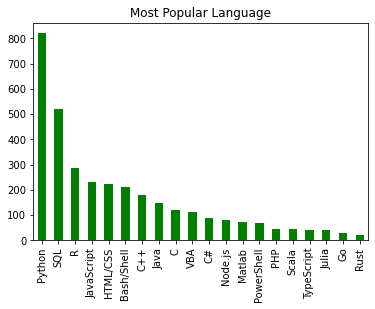

In [16]:
temp2 = pd.DataFrame(ds_2021['LanguageHaveWorkedWith'].dropna().str.split(';').tolist()).stack()
temp2 = temp2.value_counts().sort_values(ascending=False).head(20)
temp2.plot(kind='bar',title='Most Popular Language',color='green')

In [17]:
#4. How's the salary of these job?
salary_mean = ds_2021.groupby('DevType')['ConvertedCompYearly'].mean().reset_index()
salary_median = ds_2021.groupby('DevType')['ConvertedCompYearly'].median().reset_index()
salary_mean.rename(columns={'DevType':'Job'})

,Job,ConvertedCompYearly
0,Data or business analyst,116602.342105
1,Data scientist or machine learning specialist,126765.693252


In [18]:
salary_median.rename(columns={'DevType':'Job'})

,Job,ConvertedCompYearly
0,Data or business analyst,53508.0
1,Data scientist or machine learning specialist,61616.0


<AxesSubplot:>

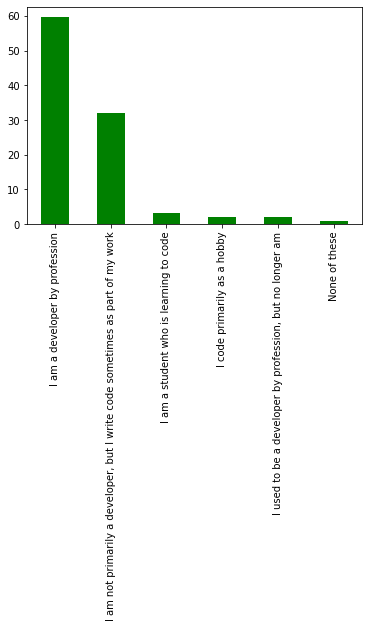

In [19]:
#5. Are people originally a developer?
prev = (ds_2021['MainBranch'].value_counts()/ds_2021['MainBranch'].count())*100
prev.plot(kind='bar',color='green')